In this project, We are going to analyze the crimes of the neighborhoods of the city of Buenos Aires in the years 2017 to 2019 and decide what neighborhood is the safest for living and buying things.
First we import the csv for every year and compare the each crimes in every year to determine the evolution of it. We are going to show it through a bar plot. Second, we are create a choropleth map to determine which 'Comuna' (neighborhood) has the most crimes. Finally, taking the FOURSQUARE API, we extract the venues for each comuna and use the unsupervised alghortim, k-means, for grouping the comunas that have some venues.
Taking this steps are important to define which comuna is the best for living

In [1]:
import pandas as pd
import numpy as np
import json
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium installed and imported!')
from folium import plugins
!wget --quiet http://cdn.buenosaires.gob.ar/datosabiertos/datasets/comunas/CABA_comunas.geojson
print('GeoJSON file downloaded!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    pandas-1.0.3               |   py36h830a2c2_1        11.1 MB  conda-

In [2]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
delitos_2019 = pd.read_csv('delitos_2019.csv')
delitos_2018 = pd.read_csv('delitos_2018.csv')
delitos_2017 = pd.read_csv('delitos_2017.csv')

First, we are cleaning the data to have the dataset in perfect condition for analize

In [4]:
#data cleaning

def limpiar_delitos(delitos):
    delitos.dropna(subset = ['comuna'], axis = 0,inplace = True)
    delitos[['cantidad_registrada']] = delitos[['cantidad_registrada']].astype(int)
    delitos['fecha'] = pd.to_datetime(delitos['fecha'])
    delitos['fecha'] = delitos['fecha'].dt.strftime('%m/%d/%Y')
    delitos.drop(["id", "franja_horaria", "subtipo_delito"], axis = 1, inplace = True)
    delitos['tipo_delito'] = delitos['tipo_delito'].replace(r"\(.*\)",' ', regex = True)
    delitos.rename(columns = {'lat':'Latitude','long':'Longitud'}, inplace = True)
    lista_columnas = list(delitos.columns)
    lista_columnas  = [columnas.capitalize() for columnas in lista_columnas] 
    delitos.columns = lista_columnas
    return(delitos)

In [5]:
delitos_2019 = limpiar_delitos(delitos_2019)
delitos_2018 = limpiar_delitos(delitos_2018)
delitos_2017 = limpiar_delitos(delitos_2017)

In [6]:
print(delitos_2019['Cantidad_registrada'].value_counts())
print(delitos_2018['Cantidad_registrada'].value_counts())
print(delitos_2017['Cantidad_registrada'].value_counts())

1    117057
2         7
Name: Cantidad_registrada, dtype: int64
1    118424
2         8
3         1
Name: Cantidad_registrada, dtype: int64
1    118710
2        10
3         2
4         1
Name: Cantidad_registrada, dtype: int64


In [7]:
# Because there are little rows in 'Cantidad_registradas' different with value = 1 , we drop it 
delitos_2019.drop('Cantidad_registrada', axis = 1, inplace = True)
delitos_2018.drop('Cantidad_registrada', axis = 1, inplace = True)
delitos_2017.drop('Cantidad_registrada', axis = 1, inplace = True)

In [8]:
print(delitos_2019.head())
print(delitos_2018.head())
print(delitos_2017.head())

        Fecha Tipo_delito  Comuna            Barrio   Latitude   Longitud
0  01/01/2019    Lesiones     4.0     Nueva Pompeya -34.648387 -58.404748
1  01/01/2019      Robo       9.0           Liniers -34.649827 -58.513859
2  01/01/2019    Lesiones    15.0         Chacarita -34.588108 -58.439392
3  01/01/2019     Hurto      10.0          Floresta -34.631877 -58.483975
4  01/01/2019      Robo       4.0  Parque Patricios -34.633161 -58.397123
        Fecha Tipo_delito  Comuna           Barrio   Latitude   Longitud
0  01/01/2018     Hurto      10.0  Vélez Sársfield -34.624523 -58.502294
1  01/01/2018     Hurto       8.0     Villa Lugano -34.669643 -58.464153
2  01/01/2018     Hurto       8.0     Villa Lugano -34.680992 -58.465303
3  01/01/2018      Robo      13.0         Belgrano -34.571114 -58.464845
4  01/01/2018     Hurto       4.0         Barracas -34.646857 -58.380158
        Fecha Tipo_delito  Comuna            Barrio   Latitude   Longitud
0  01/01/2017      Robo       6.0         Ca

In [9]:
def columna_anio(delitos):
    delitos['Año'] = pd.to_datetime(delitos['Fecha'])
    delitos['Año'] = delitos['Año'].dt.strftime('%Y')
    return(delitos)

In [10]:
delitos_2019 = columna_anio(delitos_2019)
delitos_2018 = columna_anio(delitos_2018)
delitos_2017 = columna_anio(delitos_2017)

In [11]:
delitos_final = pd.concat([delitos_2019,delitos_2018,delitos_2017])
delitos_final.drop('Fecha',1, inplace = True)

In [12]:
#columnas = delitos_final.columns.to_list()
#columnas = columnas[-1:] + columnas[:-1]
#delitos_final = delitos_final[columnas]

In [13]:
#lista_barrio = list(delitos_final['Barrio'].unique())
#df_barrios_final = pd.DataFrame([item for item in lista_barrio])

In [14]:
delitos_final.head()

,Tipo_delito,Comuna,Barrio,Latitude,Longitud,Año
0,Lesiones,4.0,Nueva Pompeya,-34.648387,-58.404748,2019
1,Robo,9.0,Liniers,-34.649827,-58.513859,2019
2,Lesiones,15.0,Chacarita,-34.588108,-58.439392,2019
3,Hurto,10.0,Floresta,-34.631877,-58.483975,2019
4,Robo,4.0,Parque Patricios,-34.633161,-58.397123,2019


In [228]:
delitos_final.shape

(354220, 6)

In [15]:
# Tipo de Delito vs Año
delitos_final_cantidad = pd.crosstab(delitos_final['Tipo_delito'],delitos_final['Año'])

In [16]:
delitos_final_cantidad.rename(columns = {'Robo  ':'Robo','Hurto  ':'Hurto'} , inplace = True)

In [17]:
delitos_final_cantidad

Año,2017,2018,2019
Tipo_delito,,,
Homicidio,263,266,185
Hurto,42050,40941,49163
Lesiones,9809,7947,5067
Robo,66601,69279,62649


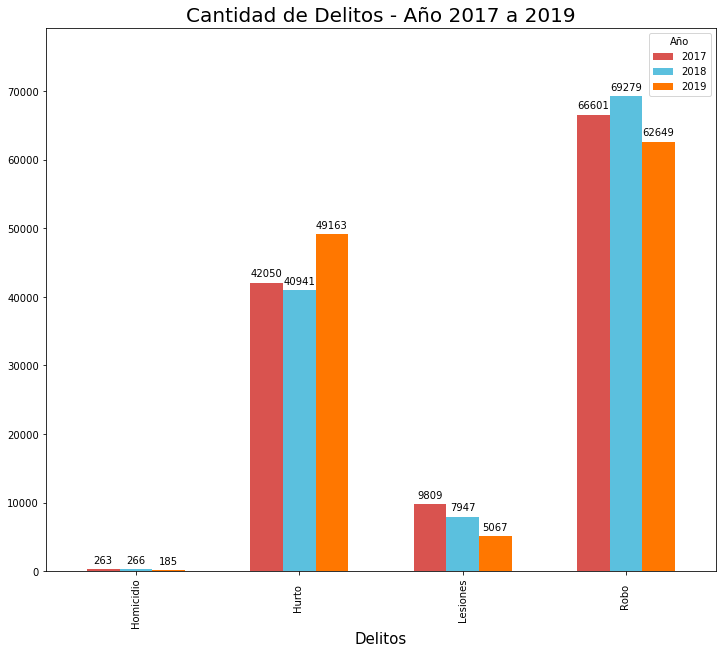

In [18]:
ax = delitos_final_cantidad.plot(kind = 'bar' , figsize = (12,10),
                      width = 0.6,
                      color = ['#d9534f','#5bc0de', '#ff7700'],
                     fontsize = 10)

ax.set_ylim(0,delitos_final_cantidad.max().max() + 10000)
ax.set_title('Cantidad de Delitos - Año 2017 a 2019', fontsize = 20)
ax.set_xlabel('Delitos', fontsize = 15)

for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), 
                 textcoords="offset points", ha="center", va="bottom", fontsize = 10)

plt.savefig("Cantidad_Delitos.jpg")


In [19]:
def top5_delitos(delitos):
    top5_delitos = delitos.groupby(['Año','Comuna']).count().reset_index()
    top5_delitos.drop(['Barrio','Latitude','Longitud'],1,inplace = True)
    top5_delitos.columns = ['Año','Comuna','Cantidad']
    top5_delitos = top5_delitos.sort_values(['Año','Cantidad'], ascending = False)
    top5_delitos = pd.concat([top5_delitos[top5_delitos['Año'] == '2019'].head(5),
                              top5_delitos[top5_delitos['Año'] == '2018'].head(5),
                              top5_delitos[top5_delitos['Año'] == '2017'].head(5)])
    return (top5_delitos)

In [20]:
delitos_final_homicidio = delitos_final[delitos_final['Tipo_delito'] == 'Homicidio']
delitos_final_robo = delitos_final[delitos_final['Tipo_delito'] == 'Robo  ']
delitos_final_lesiones = delitos_final[delitos_final['Tipo_delito'] == 'Lesiones']
delitos_final_hurto = delitos_final[delitos_final['Tipo_delito'] == 'Hurto  ']

delitos_homicidio = top5_delitos(delitos_final_homicidio)
delitos_robo = top5_delitos(delitos_final_robo)
delitos_lesiones = top5_delitos(delitos_final_lesiones)
delitos_hurto = top5_delitos(delitos_final_hurto)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


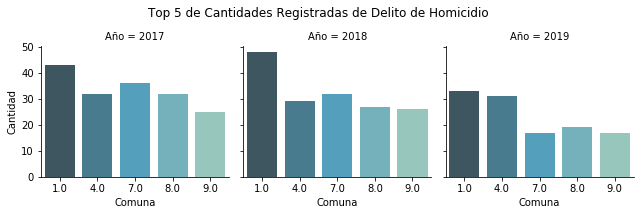

In [21]:
import seaborn as sns

g = sns.FacetGrid(delitos_homicidio, col = 'Año')
g = g.map(sns.barplot, 'Comuna','Cantidad',
         palette="GnBu_d")

plt.subplots_adjust(top=0.8)
plt.suptitle("Top 5 de Cantidades Registradas de Delito de Homicidio ")
plt.savefig("Top5_Homicidio.jpg")

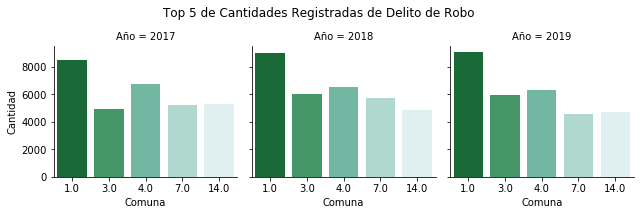

In [22]:
g = sns.FacetGrid(delitos_robo, col = 'Año')
g = g.map(sns.barplot, 'Comuna','Cantidad',
         palette="BuGn_r")

plt.subplots_adjust(top=0.8)
plt.suptitle("Top 5 de Cantidades Registradas de Delito de Robo ")
plt.savefig("Top5_robo.jpg")

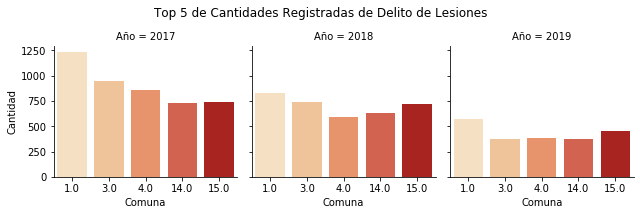

In [23]:
g = sns.FacetGrid(delitos_lesiones, col = 'Año')
g = g.map(sns.barplot, 'Comuna','Cantidad',
         palette="OrRd")

plt.subplots_adjust(top=0.8)
plt.suptitle("Top 5 de Cantidades Registradas de Delito de Lesiones")
plt.savefig("Top5_lesiones.jpg")

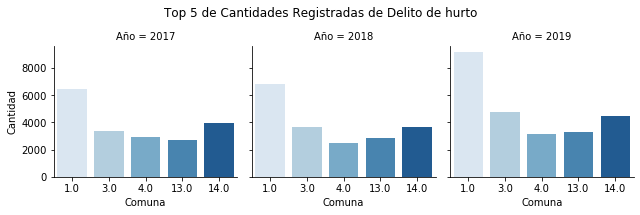

In [24]:
g = sns.FacetGrid(delitos_hurto, col = 'Año')
g = g.map(sns.barplot, 'Comuna','Cantidad',
         palette="Blues")

plt.subplots_adjust(top=0.8)
plt.suptitle("Top 5 de Cantidades Registradas de Delito de hurto")
plt.savefig("Top5_hurto.jpg")

In [25]:
delitos_final_comuna_cantidad = delitos_final['Comuna'].value_counts().to_frame().reset_index()
delitos_final_comuna_cantidad[['Comuna']] = round(delitos_final_comuna_cantidad[['Comuna']] / len(delitos_final['Año'].unique()),0).astype(int)
delitos_final_comuna_cantidad.columns = ['Comuna','Cantidad']
delitos_final_comuna_cantidad.sort_values(['Comuna'])

,Comuna,Cantidad
0,1.0,17297
13,2.0,5550
1,3.0,10268
2,4.0,10030
7,5.0,6940
14,6.0,5402
4,7.0,8396
10,8.0,5805
8,9.0,6729
12,10.0,5741


In [26]:
delitos_final_comuna_cantidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Comuna    15 non-null     float64
 1   Cantidad  15 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 368.0 bytes


We import CABA_comunas.geojson for the website from the DATA of government of Buenos Aires and read to show which neighborhood is grouped in each Comuna

In [27]:
with open('CABA_comunas.geojson') as json_data:
    CABA_comunas = json.load(json_data)

In [28]:
comunas_barrios = []
for i in range(len(CABA_comunas['features'])):
    comunas_barrios.append([CABA_comunas['features'][i]['properties']['COMUNAS'],
        CABA_comunas['features'][i]['properties']['BARRIOS']])

In [29]:
comunas_barrios = pd.DataFrame([item for item in comunas_barrios])
comunas_barrios.columns = ['Comuna', 'Barrios']
comunas_barrios

,Comuna,Barrios
0,2.0,RECOLETA
1,5.0,ALMAGRO - BOEDO
2,6.0,CABALLITO
3,7.0,FLORES - PARQUE CHACABUCO
4,9.0,LINIERS - MATADEROS - PARQUE AVELLANEDA
5,10.0,FLORESTA - MONTE CASTRO - VELEZ SARSFIELD - VE...
6,11.0,VILLA DEL PARQUE - VILLA DEVOTO - VILLA GRAL....
7,12.0,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...
8,14.0,PALERMO
9,3.0,BALVANERA - SAN CRISTOBAL


In [30]:
delitos_final_comuna_cantidad = pd.merge(delitos_final_comuna_cantidad,
                 comunas_barrios[['Comuna', 'Barrios']],
                 on='Comuna', 
                 how='right')

In [31]:
delitos_final_comuna_cantidad.sort_values(['Cantidad'], ascending = False)
delitos_final_comuna_cantidad = delitos_final_comuna_cantidad[['Comuna','Barrios','Cantidad']]
delitos_final_comuna_cantidad

,Comuna,Barrios,Cantidad
0,1.0,CONSTITUCION - MONSERRAT - PUERTO MADERO - RE...,17297
1,3.0,BALVANERA - SAN CRISTOBAL,10268
2,4.0,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...,10030
3,14.0,PALERMO,9549
4,7.0,FLORES - PARQUE CHACABUCO,8396
5,13.0,BELGRANO - COLEGIALES - NUÑEZ,7293
6,15.0,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERN...,7103
7,5.0,ALMAGRO - BOEDO,6940
8,9.0,LINIERS - MATADEROS - PARQUE AVELLANEDA,6729
9,12.0,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,6174


Now that we have the count for each neighborhood, let's plot it using cloropleth map

In [32]:
baires_geo = r'CABA_comunas.geojson'

threshold_scale = np.linspace(delitos_final_comuna_cantidad['Cantidad'].min(),
                              delitos_final_comuna_cantidad['Cantidad'].max(),
                              6, dtype=int)

threshold_scale = threshold_scale.tolist() 
threshold_scale[-1] = threshold_scale[-1] + 1 

baires_map = folium.Map(location=[-34.61, -58.37], zoom_start=11)

baires_map.choropleth(
    geo_data=baires_geo,
    data=delitos_final_comuna_cantidad,
    columns=['Comuna', 'Cantidad'],
    key_on='feature.properties.COMUNAS',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    threshold_scale=threshold_scale,
    legend_name='Crimes in CABA'
)


baires_map

Now we are extract the venues for each comuna for decide where we should live in the near future

In [33]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

We import barrios.geojson for the website from the DATA of government of Buenos Aires

In [34]:
!wget --quiet http://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios.geojson
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [35]:
with open('barrios.geojson') as json_data:
    caba_barrios = json.load(json_data)

In [36]:
len(caba_barrios['features'])

48

In [37]:
barrios = []
for i in range(len(caba_barrios['features'])):
    barrios.append([caba_barrios['features'][i]['properties']['comuna'],
        caba_barrios['features'][i]['properties']['barrio'],
        caba_barrios['features'][i]['geometry']['coordinates'][0][20][1],
        caba_barrios['features'][i]['geometry']['coordinates'][0][20][0]])

In [38]:
barrios = pd.DataFrame([item for item in barrios])  

In [39]:
barrios.columns = ['Comuna','Barrio','Latitud','Longitud']

In [40]:
barrios = barrios.groupby(['Comuna']).mean().reset_index()

In [41]:
barrios.iloc[13,1] = -34.5786
barrios.iloc[13,2] = -58.4269
barrios.iloc[1,1] = -34.5877
barrios.iloc[1,2] = -58.3967
barrios.iloc[0,1] = -34.6087
barrios.iloc[0,2] = -58.3802
barrios.iloc[4,1] = -34.6085
barrios.iloc[4,2] = -58.4219
barrios.iloc[14,1] = -34.5918
barrios.iloc[14,2] = -58.4598

In [42]:
barrios

,Comuna,Latitud,Longitud
0,1,-34.608700,-58.380200
1,2,-34.587700,-58.396700
2,3,-34.613767,-58.399165
3,4,-34.642343,-58.384727
4,5,-34.608500,-58.421900
5,6,-34.619425,-58.428318
6,7,-34.648471,-58.453215
7,8,-34.672875,-58.456911
8,9,-34.646136,-58.500761
9,10,-34.630248,-58.499377


In [43]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0



geopy-1.21.0         | 58 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [44]:
address = 'Buenos Aires, Argentina'
geolocator = Nominatim(user_agent="baires_explorer")
location = geolocator.geocode(address)
latitud = location.latitude
longitud = location.longitude
print('Las coordenadas geograficas de Buenos Aires, Argentina are {}, {}.'.format(latitud, longitud))

Las coordenadas geograficas de Buenos Aires, Argentina are -34.6075682, -58.4370894.


In [45]:
map_baires = folium.Map(location=[latitud, longitud], zoom_start=11)

for lat, lng, comuna in zip(barrios['Latitud'], barrios['Longitud'],barrios['Comuna']):
    label = 'Comuna: {}'.format(comuna)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_baires)  
    
map_baires

Import venues from Foursquare API

In [46]:
CLIENT_ID = 'RCXF1A2MJVPHOJKN3Z2BM1BZD1SODJW3IGADFUG2K1M0IRMM'
CLIENT_SECRET = 'YU4THAGROZ3RYCYFMZJPOBUCNEJAB3KEDCD4T45W1K2HALYA'
VERSION = '20200426'

In [47]:
from pandas.io.json import json_normalize 
import requests

In [197]:
def getNearbyVenues(comuna, latitudes, longitudes, radius=1000, LIMIT = 100):
    
    venues_list=[]
    for comuna, lat, lng in zip(comuna, latitudes, longitudes):
        print(comuna)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            comuna, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Comuna', 
                  'Latitud', 
                  'Longitude', 
                  'Lugar', 
                  'Latitud del Lugar', 
                  'Longitud del Lugar', 
                  'Categoria del Lugar']
    
    return(nearby_venues)
          

In [198]:
comuna_venues = getNearbyVenues(comuna=barrios['Comuna'],
                                   latitudes=barrios['Latitud'],
                                   longitudes=barrios['Longitud']
                                  )

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [199]:
print(comuna_venues.shape)
comuna_venues.head()

(936, 7)


,Comuna,Latitud,Longitude,Lugar,Latitud del Lugar,Longitud del Lugar,Categoria del Lugar
0,1,-34.6087,-58.3802,de Dios Editores,-34.609999,-58.379109,Bookstore
1,1,-34.6087,-58.3802,Foto Club Buenos Aires,-34.609475,-58.378273,Camera Store
2,1,-34.6087,-58.3802,Starbucks,-34.609013,-58.380196,Coffee Shop
3,1,-34.6087,-58.3802,Hostel Portal del Sur BA,-34.609428,-58.378450,Bed & Breakfast
4,1,-34.6087,-58.3802,Latino Sándwich,-34.610413,-58.379110,Sandwich Place


In [200]:
comuna_cant = comuna_venues.groupby(['Comuna']).count()
comuna_cant = comuna_cant.iloc[:,0]
comuna_cant = comuna_cant.sort_values()

In [201]:
print('Hay {} categorias unicas'.format(len(comuna_venues['Categoria del Lugar'].unique())))

Hay 171 categorias unicas


Text(0, 0.5, 'Comuna')

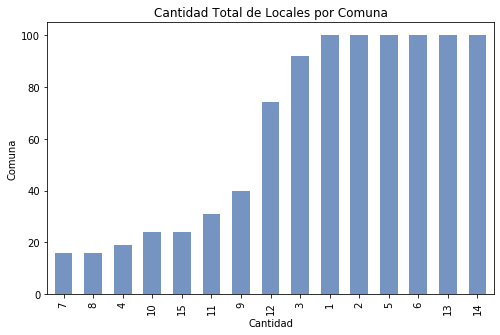

In [202]:
ax = comuna_cant.plot(kind = 'bar' , figsize = (8,5),
                      width = 0.6,
                     fontsize = 10, color=(0.1, 0.3, 0.6, 0.6))

ax.set_title('Cantidad Total de Locales por Comuna')
ax.set_xlabel('Cantidad')
ax.set_ylabel('Comuna')

In [203]:
caba_onehot = pd.get_dummies(comuna_venues[['Categoria del Lugar']], prefix="", prefix_sep="")

caba_onehot['Comuna'] = comuna_venues['Comuna'] 

fixed_columns = [caba_onehot.columns[-1]] + list(caba_onehot.columns[:-1])

caba_onehot = caba_onehot[fixed_columns]

caba_onehot.head(5)

,Comuna,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,...,Vacation Rental,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [204]:
caba_grouped = caba_onehot.groupby('Comuna').mean().reset_index()
caba_grouped

,Comuna,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,...,Vacation Rental,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,1,0.000000,0.030000,0.00,0.00,0.00,0.000000,0.000000,0.000,0.020000,...,0.00,0.000000,0.01,0.000000,0.01,0.00,0.01,0.000000,0.00,0.00
1,2,0.020000,0.070000,0.01,0.02,0.00,0.000000,0.000000,0.000,0.000000,...,0.01,0.000000,0.00,0.010000,0.00,0.00,0.00,0.010000,0.00,0.00
2,3,0.000000,0.054348,0.00,0.00,0.00,0.000000,0.000000,0.000,0.032609,...,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00
3,4,0.000000,0.157895,0.00,0.00,0.00,0.000000,0.052632,0.000,0.000000,...,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00
4,5,0.000000,0.120000,0.00,0.00,0.00,0.000000,0.000000,0.000,0.010000,...,0.00,0.020000,0.00,0.010000,0.00,0.00,0.00,0.000000,0.00,0.00
5,6,0.000000,0.040000,0.00,0.00,0.00,0.010000,0.000000,0.000,0.020000,...,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00
6,7,0.000000,0.000000,0.00,0.00,0.00,0.187500,0.000000,0.000,0.000000,...,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00
7,8,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000,0.000000,...,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00
8,9,0.000000,0.075000,0.00,0.00,0.00,0.000000,0.000000,0.025,0.025000,...,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.025000,0.00,0.00
9,10,0.000000,0.166667,0.00,0.00,0.00,0.000000,0.000000,0.000,0.083333,...,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00


In [205]:
num_top_venues = 5

for hood in caba_grouped['Comuna']: 
    print("----"+"Comuna "+str(hood)+"----")
    temp = caba_grouped[caba_grouped['Comuna'] == hood].T.reset_index()
    temp.columns = ['Lugar','Frecuencia']
    temp = temp.iloc[1:]
    temp['Frecuencia'] = temp['Frecuencia'].astype(float)
    temp = temp.round({'Frecuencia': 2})
    print(temp.sort_values('Frecuencia', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Comuna 1----
                Lugar  Frecuencia
0               Hotel        0.10
1             Theater        0.09
2         Coffee Shop        0.09
3                Café        0.07
4  Spanish Restaurant        0.05


----Comuna 2----
                    Lugar  Frecuencia
0                   Hotel        0.10
1  Argentinian Restaurant        0.07
2      Italian Restaurant        0.06
3          Ice Cream Shop        0.06
4                   Plaza        0.06


----Comuna 3----
                 Lugar  Frecuencia
0                 Café        0.08
1  Japanese Restaurant        0.07
2          Pizza Place        0.07
3   Spanish Restaurant        0.05
4               Bakery        0.05


----Comuna 4----
                    Lugar  Frecuencia
0  Argentinian Restaurant        0.16
1                    Café        0.11
2              Restaurant        0.05
3          Hardware Store        0.05
4                   Plaza        0.05


----Comuna 5----
                    Lugar  Frecuencia

In [206]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [207]:
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Comuna']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Lugares Más Comunes'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Lugares Más Comunes'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Comuna'] = caba_grouped['Comuna']

for ind in np.arange(caba_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(caba_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Comuna,1st Lugares Más Comunes,2nd Lugares Más Comunes,3rd Lugares Más Comunes,4th Lugares Más Comunes,5th Lugares Más Comunes,6th Lugares Más Comunes,7th Lugares Más Comunes,8th Lugares Más Comunes,9th Lugares Más Comunes,10th Lugares Más Comunes
0,1,Hotel,Coffee Shop,Theater,Café,Spanish Restaurant,Restaurant,Hostel,Nightclub,Argentinian Restaurant,Gym / Fitness Center
1,2,Hotel,Argentinian Restaurant,Ice Cream Shop,Italian Restaurant,Plaza,Bakery,Coffee Shop,Tea Room,Deli / Bodega,Café
2,3,Café,Pizza Place,Japanese Restaurant,Argentinian Restaurant,Spanish Restaurant,Bakery,Coffee Shop,Gym,Hotel,Bar
3,4,Argentinian Restaurant,Café,Pedestrian Plaza,Train Station,Flower Shop,Clothing Store,General Entertainment,Soccer Field,Grocery Store,Restaurant
4,5,Argentinian Restaurant,Bar,Café,Ice Cream Shop,Gym,Restaurant,Coffee Shop,Pizza Place,Hotel,Indie Theater


In [208]:
kclusters = 6

caba_grouped_clustering = caba_grouped.drop('Comuna', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(caba_grouped_clustering)

kmeans.labels_[0:10]

array([0, 0, 1, 5, 0, 0, 3, 4, 1, 1], dtype=int32)

In [209]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

caba_merged = barrios

caba_merged = caba_merged.join(neighborhoods_venues_sorted.set_index('Comuna'), on='Comuna')

caba_merged.head()

,Comuna,Latitud,Longitud,Cluster Labels,1st Lugares Más Comunes,2nd Lugares Más Comunes,3rd Lugares Más Comunes,4th Lugares Más Comunes,5th Lugares Más Comunes,6th Lugares Más Comunes,7th Lugares Más Comunes,8th Lugares Más Comunes,9th Lugares Más Comunes,10th Lugares Más Comunes
0,1,-34.608700,-58.380200,0,Hotel,Coffee Shop,Theater,Café,Spanish Restaurant,Restaurant,Hostel,Nightclub,Argentinian Restaurant,Gym / Fitness Center
1,2,-34.587700,-58.396700,0,Hotel,Argentinian Restaurant,Ice Cream Shop,Italian Restaurant,Plaza,Bakery,Coffee Shop,Tea Room,Deli / Bodega,Café
2,3,-34.613767,-58.399165,1,Café,Pizza Place,Japanese Restaurant,Argentinian Restaurant,Spanish Restaurant,Bakery,Coffee Shop,Gym,Hotel,Bar
3,4,-34.642343,-58.384727,5,Argentinian Restaurant,Café,Pedestrian Plaza,Train Station,Flower Shop,Clothing Store,General Entertainment,Soccer Field,Grocery Store,Restaurant
4,5,-34.608500,-58.421900,0,Argentinian Restaurant,Bar,Café,Ice Cream Shop,Gym,Restaurant,Coffee Shop,Pizza Place,Hotel,Indie Theater


In [210]:
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(caba_merged['Latitud'], caba_merged['Longitud'], caba_merged['Comuna'], caba_merged['Cluster Labels']):
    label = folium.Popup('Comuna ' + str(poi) + ';' + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(baires_map)
    
baires_map


In [225]:
caba_merged.loc[caba_merged['Cluster Labels'] == 0, caba_merged.columns[[0] + list(range(4, caba_merged.shape[1]))]]

,Comuna,1st Lugares Más Comunes,2nd Lugares Más Comunes,3rd Lugares Más Comunes,4th Lugares Más Comunes,5th Lugares Más Comunes,6th Lugares Más Comunes,7th Lugares Más Comunes,8th Lugares Más Comunes,9th Lugares Más Comunes,10th Lugares Más Comunes
0,1,Hotel,Coffee Shop,Theater,Café,Spanish Restaurant,Restaurant,Hostel,Nightclub,Argentinian Restaurant,Gym / Fitness Center
1,2,Hotel,Argentinian Restaurant,Ice Cream Shop,Italian Restaurant,Plaza,Bakery,Coffee Shop,Tea Room,Deli / Bodega,Café
4,5,Argentinian Restaurant,Bar,Café,Ice Cream Shop,Gym,Restaurant,Coffee Shop,Pizza Place,Hotel,Indie Theater
5,6,Ice Cream Shop,Bakery,Coffee Shop,Café,Pizza Place,Burger Joint,Argentinian Restaurant,Bar,Gym,Pharmacy
13,14,Argentinian Restaurant,Hotel,Ice Cream Shop,Pizza Place,Gym / Fitness Center,Coffee Shop,Deli / Bodega,Bakery,Sushi Restaurant,Wine Shop


In [219]:
caba_merged.loc[caba_merged['Cluster Labels'] == 1, caba_merged.columns[[0] + list(range(4, caba_merged.shape[1]))]]

,Comuna,1st Lugares Más Comunes,2nd Lugares Más Comunes,3rd Lugares Más Comunes,4th Lugares Más Comunes,5th Lugares Más Comunes,6th Lugares Más Comunes,7th Lugares Más Comunes,8th Lugares Más Comunes,9th Lugares Más Comunes,10th Lugares Más Comunes
2,3,Café,Pizza Place,Japanese Restaurant,Argentinian Restaurant,Spanish Restaurant,Bakery,Coffee Shop,Gym,Hotel,Bar
8,9,Pizza Place,Argentinian Restaurant,Café,Dessert Shop,Coffee Shop,Bus Stop,Bakery,Sports Club,Ice Cream Shop,Deli / Bodega
9,10,Argentinian Restaurant,Pizza Place,BBQ Joint,Bakery,Gas Station,Bar,Event Space,Sports Club,Steakhouse,Supermarket
10,11,Plaza,Café,Ice Cream Shop,Breakfast Spot,Pharmacy,Bakery,Pizza Place,Coffee Shop,Supermarket,Food
11,12,Pizza Place,Ice Cream Shop,Bakery,Café,Argentinian Restaurant,Italian Restaurant,Coffee Shop,BBQ Joint,Bus Stop,Grocery Store
12,13,BBQ Joint,Café,Coffee Shop,Pizza Place,Italian Restaurant,Sushi Restaurant,Restaurant,Ice Cream Shop,Sandwich Place,Grocery Store


In [220]:
caba_merged.loc[caba_merged['Cluster Labels'] == 2, caba_merged.columns[[0] + list(range(4, caba_merged.shape[1]))]]

,Comuna,1st Lugares Más Comunes,2nd Lugares Más Comunes,3rd Lugares Más Comunes,4th Lugares Más Comunes,5th Lugares Más Comunes,6th Lugares Más Comunes,7th Lugares Más Comunes,8th Lugares Más Comunes,9th Lugares Más Comunes,10th Lugares Más Comunes
14,15,Pizza Place,Coffee Shop,Bar,Theater,Museum,Sandwich Place,Electronics Store,Spanish Restaurant,Sporting Goods Shop,Office


In [221]:
caba_merged.loc[caba_merged['Cluster Labels'] == 3, caba_merged.columns[[0] + list(range(4, caba_merged.shape[1]))]]

,Comuna,1st Lugares Más Comunes,2nd Lugares Más Comunes,3rd Lugares Más Comunes,4th Lugares Más Comunes,5th Lugares Más Comunes,6th Lugares Más Comunes,7th Lugares Más Comunes,8th Lugares Más Comunes,9th Lugares Más Comunes,10th Lugares Más Comunes
6,7,Plaza,Athletics & Sports,Pizza Place,Light Rail Station,Hockey Field,Soccer Field,Convenience Store,Moving Target,Restaurant,Korean Restaurant


In [222]:
caba_merged.loc[caba_merged['Cluster Labels'] == 4, caba_merged.columns[[0] + list(range(4, caba_merged.shape[1]))]]

,Comuna,1st Lugares Más Comunes,2nd Lugares Más Comunes,3rd Lugares Más Comunes,4th Lugares Más Comunes,5th Lugares Más Comunes,6th Lugares Más Comunes,7th Lugares Más Comunes,8th Lugares Más Comunes,9th Lugares Más Comunes,10th Lugares Más Comunes
7,8,Fast Food Restaurant,Electronics Store,Ice Cream Shop,Café,Hardware Store,Sporting Goods Shop,Coffee Shop,Mobile Phone Shop,Shopping Mall,Light Rail Station


In [223]:
caba_merged.loc[caba_merged['Cluster Labels'] == 5, caba_merged.columns[[0] + list(range(4, caba_merged.shape[1]))]]

,Comuna,1st Lugares Más Comunes,2nd Lugares Más Comunes,3rd Lugares Más Comunes,4th Lugares Más Comunes,5th Lugares Más Comunes,6th Lugares Más Comunes,7th Lugares Más Comunes,8th Lugares Más Comunes,9th Lugares Más Comunes,10th Lugares Más Comunes
3,4,Argentinian Restaurant,Café,Pedestrian Plaza,Train Station,Flower Shop,Clothing Store,General Entertainment,Soccer Field,Grocery Store,Restaurant


In conclusion, we see on the map which comunes has more venues in common using k-means and in turn, which are more dangerous. But this information is biased since the expected information is not what is actually seen. This can occur because not all cases are reported and may differ in reality.
For future research, we could consider other variables such as the price per house, the number of police in each neighborhood and others crimes